# Quel film recommander ?
La démarche basée sur les dénombrements est extrêmement séduisante par sa simplicité.
Un simple comptage permet de produire les probabilités conditionnelles et d'en déduire les règles d'associations. Toutefois, elle n'est pas viable en situation réelle.
Pas assez précise et statique, nous préférons la technique de la régression qui est généralement utilisée pour construire des modèles prédictifs.
La régression est un ensemble de méthodes statistiques très utilisées pour analyser la relation d'une variable par rapport à une ou plusieurs autres variables.
En apprentissage statistique, nous distinguons deux types de problème :
-  les problèmes de régression,
- les problèmes de classification.

Ainsi, nous considérons que les problèmes de prédiction d'une variable quantitative sont des problèmes de régression tandis que les problèmes de prédiction d'une variable qualitative sont des problèmes de classification.
Certaines méthodes, comme la régression logistique, sont à la fois des méthodes de régression au sens où il s'agit de prédire la probabilité d'appartenir à chacune des classes et des méthodes de classification.
Les applications sont nombreuses, certains touchent directement à la vie quotidienne :
- déterminer la viabilité d'un client sollicitant un crédit à partir de ses caractéristiques (exemple : âge, type d'emploi, niveau de revenu, autres crédits en cours, etc.).
- quantifier le risque de survenue d'un sinistre pour une personne sollicitant un contrat d'assurance.
- discerner les facteurs de risque de survenue d'une maladie cardio-vasculaire chez des patients (exemple : âge, sexe, tabac, alcool, regarder les matchs de l'équipe de France de football, etc.).
- pour une enseigne de grande distribution, cibler les clients qui peuvent être intéressés par tel ou tel type de produit.


Vous souhaitez prédire les notes de films d'un utilisateur quelconque, à partir de la base de données d'une plateforme publique (type Allociné), produisant une note moyenne, pour chaque film, à partir de toutes les notes données par l'ensemble des visiteurs de la plateforme publique.


Commencez par charger votre jeu de données MyData : les données pour cet exercice, qui proviennent du site IMDb (http://www.imdb.com) sont les notes pour 422 films enregistrés. Le site IMDb conserve les notes moyennes de films, construites par tous les utilisateurs dans un tableau qui contient des informations sur le titre du film, son réalisateur, sa durée, son année de sortie, le genre, la note moyenne (celle du site IMDb), et quelques autres variables moins intéressantes.
Le fichier **Mydata.csv** contient ces informations ainsi que la note donnée par l'utilisateur que nous voulons étudier.
Nous souhaitons en effet, prédire les notes que donnera cet utilisateur à des films, en se basant sur les notes que les autres utilisateurs ont déjà donné.
La variable **IMDb** correspond à la note moyenne du film.
La variable **mine** correspond à la note du film de notre utilisateur.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [5]:
# Load data


In [6]:
Data = pd.read_csv('MyData.csv')
df = pd.DataFrame(data = Data)
print(df.head())

   position      const                   created  modified  description  \
1         1  tt2370248  Mon Feb 24 00:00:00 2014       NaN          NaN   
2         2  tt1727388  Sat Feb 22 00:00:00 2014       NaN          NaN   
3         3  tt0970179  Thu Feb 20 00:00:00 2014       NaN          NaN   
4         4  tt1007029  Tue Feb 18 00:00:00 2014       NaN          NaN   
5         5  tt0242888  Mon Feb 17 00:00:00 2014       NaN          NaN   

                     Title    Title.type              Directors  You.rated  \
1            Short Term 12  Feature Film  Destin Daniel Cretton          7   
2         The Way Way Back  Feature Film    Nat Faxon, Jim Rash          6   
3                     Hugo  Feature Film        Martin Scorsese          8   
4            The Iron Lady  Feature Film         Phyllida Lloyd          6   
5  The Sleeping Dictionary  Feature Film             Guy Jenkin          6   

   IMDb.Rating  ...  Steven Soderbergh    Woody Allen   Akira Kurosawa    \
1   

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
print(df.head())

   position      const                   created  modified  description  \
1         1  tt2370248  Mon Feb 24 00:00:00 2014       NaN          NaN   
2         2  tt1727388  Sat Feb 22 00:00:00 2014       NaN          NaN   
3         3  tt0970179  Thu Feb 20 00:00:00 2014       NaN          NaN   
4         4  tt1007029  Tue Feb 18 00:00:00 2014       NaN          NaN   
5         5  tt0242888  Mon Feb 17 00:00:00 2014       NaN          NaN   

                     Title    Title.type              Directors  You.rated  \
1            Short Term 12  Feature Film  Destin Daniel Cretton          7   
2         The Way Way Back  Feature Film    Nat Faxon, Jim Rash          6   
3                     Hugo  Feature Film        Martin Scorsese          8   
4            The Iron Lady  Feature Film         Phyllida Lloyd          6   
5  The Sleeping Dictionary  Feature Film             Guy Jenkin          6   

   IMDb.Rating  Runtime..mins.  Year                             Genres  \
1    

Afficher la distribution des notes de notre utilisateur

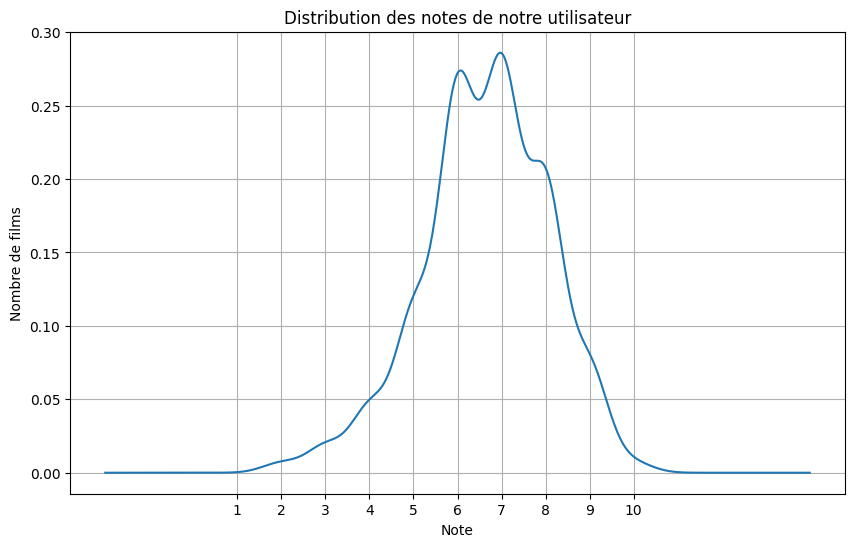

In [26]:
# Plot density of 'mine'
plt.figure(figsize=(10,6))
df['You.rated'].plot(kind='density')
plt.title('Distribution des notes de notre utilisateur')
plt.xlabel('Note')
plt.ylabel('Nombre de films')
plt.xticks(range(1,11))
plt.grid()
plt.show()

Afficher la distribution des notes des utilisateurs de IMDb (imdb)

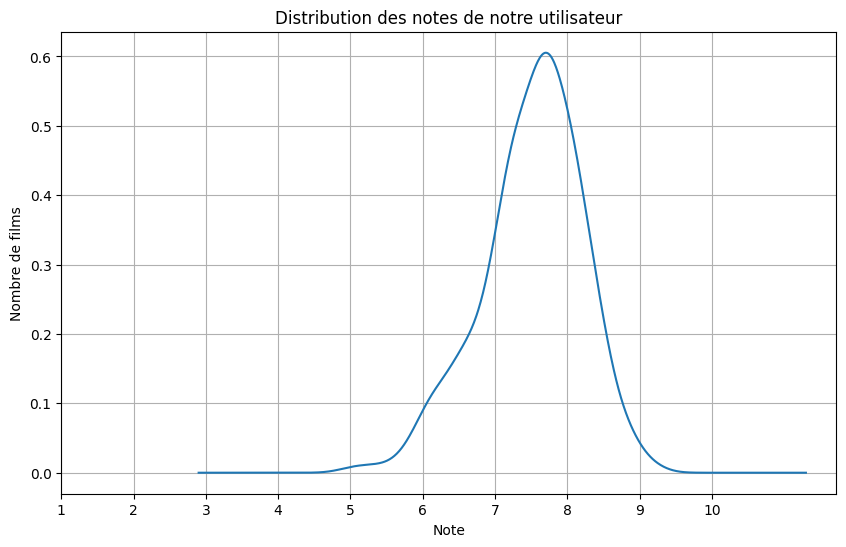

In [27]:
plt.figure(figsize=(10,6))
df['IMDb.Rating'].plot(kind='density')
plt.title('Distribution des notes de notre utilisateur')
plt.xlabel('Note')
plt.ylabel('Nombre de films')
plt.xticks(range(1,11))
plt.grid()
plt.show()

- Où se situe la moyenne sur chacune des deux courbes?
- Estimez visuellement l'écart-type.
- Donnez la variance des notes de notre utilisateur et de celles de IMDb.
- Que pouvez-vous dire sur les notes de notre utilisateur ?
- Que pouvez-vous dire sur les notes des utilisateurs d'IMDb ?
- Essayez de justifier la différence entre ces deux courbes.

In [30]:
print("IMDB : ")
print("Moyenne :",df['IMDb.Rating'].mean())
print("ecart type :",df['IMDb.Rating'].std())
print("variance :",df['IMDb.Rating'].var())
print("You : ")
print("Moyenne :",df['You.rated'].mean())
print("ecart type :",df['You.rated'].std())
print("variance :",df['You.rated'].var())

IMDB : 
Moyenne : 7.512322274881516
ecart type : 0.6915092863019583
variance : 0.47818509304184376
You : 
Moyenne : 6.637440758293839
ecart type : 1.4205218304654392
variance : 2.017882270828882


l'ecart type = environ 0,75


La fonction pairplot() de sns produit une matrice de nuages de points et attend en entrée un objet de type matrice ou de type *dataframe*.

Afficher la fonction pairplot() sur le sous ensemble de données contenant les colonnes imdb et mine


<Figure size 2000x1000 with 0 Axes>

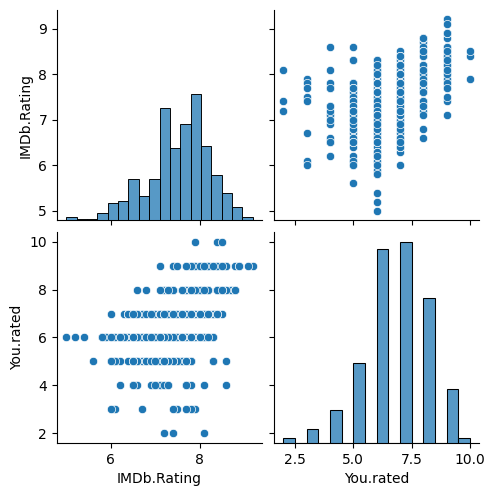

In [41]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(df[['IMDb.Rating','You.rated']])
plt.show()

En probabilités et en statistique, étudier la corrélation linéaire entre deux ou plusieurs variables aléatoires ou variables statistiques (de type quantitatif), c’est étudier l'intensité de la liaison linéaire qui peut exister entre ces variables.
Nous pouvons par exemple avoir une relation affine entre une variable quantitative $X$ et une variable quantitative $Y$ (de type $Y= a+b*X$), qui est une régression linéaire simple entre ces deux variables. La mesure de la corrélation linéaire entre ces deux variables se fait alors par le calcul du coefficient de corrélation linéaire, noté généralement $r(X,Y)$.

Trouver le signe de ces coefficient en observant les graphiques sorties **pairplot()**

Nous décidons d'afficher la relation entre les notes des utilisateurs d'IMDb et celles de notre utilisateur.

Construire une régression de type OLS qui prend en entrée les notes des utilisateurs de IMDb et en sortie celles de notre utilisateur.

In [34]:
import statsmodels.api as sm
X = df["IMDb.Rating"]
Y = df["You.rated"]
X_OLS = sm.add_constant(X)

model = sm.OLS(endog=Y, exog=X_OLS)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              You.rated   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           9.62e-25
Time:                        17:44:47   Log-Likelihood:                -693.37
No. Observations:                 422   AIC:                             1391.
Df Residuals:                     420   BIC:                             1399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6386      0.667     -0.958      0.339      -1.949       0.672
IMDb.Rating     0.9686      0.088     10.957      0.000       0.795       1.142
==============================================================================
Omnibus:                       57.674   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.091
Skew:                          -0.876   Prob(JB):                     7.44e-20
Kurtosis:                       4.394   Cond. No.                         83.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Les variables mine et imdb sont-elles corrélées linéairement?
Sur quel pourcentage du dataset avez-vous entraîné votre modèle ?
Quelle a été l'erreur maximale du modèle ?
Commentez la qualité du modèle et le résultat du test de Fisher.
Commentez à la p-valeur associée à votre variable **mine**

Les variables mine et imdb sont corrélées positivement (coef a positif) ?
Sur quel pourcentage du dataset avez-vous entraîné votre modèle ?100%
Quelle a été l'erreur maximale du modèle ?
Commentez la qualité du modèle et le résultat du test de Fisher. Rejet de l'hypothèse de tous les coefs nuls
La p-valeur associée à votre variable **mine** indique que l'hypothèse d'un coef nul est rejetée

1. Corrélation linéaire entre les variables mine et IMDb.Rating :

La corrélation linéaire entre les variables mine et IMDb.Rating peut être estimée en observant les résultats de la régression OLS. La pente (coef) associée à IMDb.Rating est de 0.9686, avec une p-valeur de 0.000, ce qui suggère que la variable IMDb.Rating est fortement corrélée à You.rated (les notes données par l'utilisateur).
La p-valeur pour IMDb.Rating est significativement inférieure à 0.05, ce qui indique une relation statistiquement significative et linéaire entre IMDb.Rating et You.rated.
2. Pourcentage du dataset utilisé pour l'entraînement du modèle :

Le modèle a été entraîné sur 422 observations au total, avec un df résiduels de 420. Cela suggère que le modèle a utilisé presque l'intégralité des données disponibles (les résidus représentent la différence entre les observations et le modèle ajusté). En d'autres termes, le pourcentage d'entraînement serait proche de 100%.
3. Erreur maximale du modèle :

L'erreur maximale du modèle peut être déduite de l'intervalle de confiance des coefficients. Pour la variable IMDb.Rating, l'intervalle de confiance est de [0.795, 1.142], ce qui indique une incertitude dans la prédiction du coefficient de la variable.
La constante (intercept) a une p-valeur relativement plus élevée (0.672), ce qui signifie qu'elle est statistiquement non significative, mais cela ne fournit pas directement l'erreur maximale. Pour obtenir une erreur maximale précise, il faudrait calculer l'écart entre les valeurs prédites et les valeurs réelles (en utilisant la somme des résidus).
4. Qualité du modèle :

R-squared : Le modèle a un R² de 0.222, ce qui signifie qu'il explique seulement 22.2% de la variance dans les données. C'est un indicateur que le modèle a une qualité faible. Il existe probablement d'autres variables importantes qui influencent You.rated mais ne sont pas incluses dans ce modèle.
Test de Fisher (F-statistic) : La p-valeur associée à la statistique de Fisher est très faible (9.62e-25), ce qui signifie que le modèle est globalement significatif (il y a une relation statistiquement significative entre les variables indépendantes et la variable dépendante).
5. P-valeur associée à la variable mine :

La p-valeur pour la constante (intercept) est de 0.672, ce qui est bien plus grand que 0.05. Cela suggère que la constante dans le modèle n'a pas de contribution significative, et donc, elle ne devrait pas être incluse dans le modèle pour améliorer la performance de la régression.


Afficher les points 'imdb' en fonction de 'mine' ainsi que la droite de régression.

<ipython-input-37-037b682b4863>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['IMDb.Rating'], model_fit.params[0] + model_fit.params[1] * df['IMDb.Rating'], color='red')


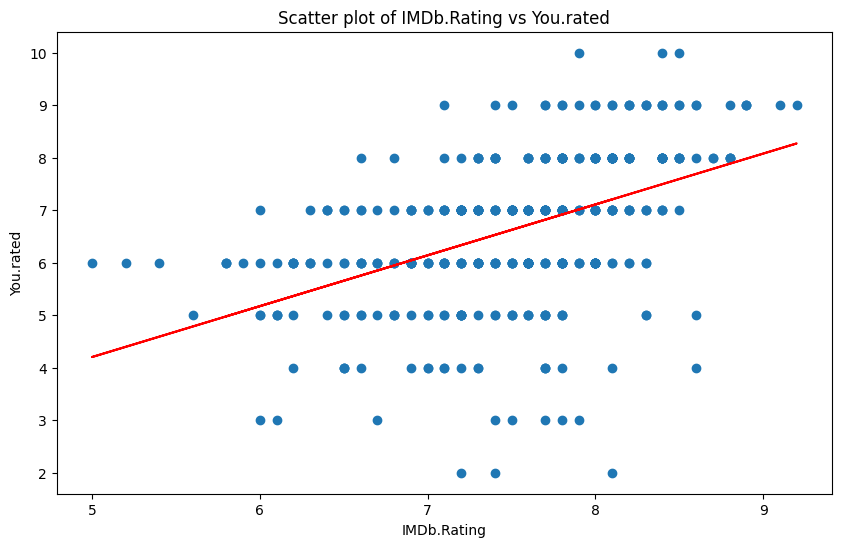

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df['IMDb.Rating'], df['You.rated'])
plt.plot(df['IMDb.Rating'], model_fit.params[0] + model_fit.params[1] * df['IMDb.Rating'], color='red')
plt.title('Scatter plot of IMDb.Rating vs You.rated')
plt.xlabel('IMDb.Rating')
plt.ylabel('You.rated')
plt.show()

On décide maintenant de modifier le graphique représentant la droite de régression et les observations mais en utilisant la couleur pour représenter différent genres

Sur quel genre de films pouvez-vous dire que l'utilisateur est difficile ?

<ipython-input-52-75636c384428>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['IMDb.Rating'], model_fit.params[0] + model_fit.params[1] * df['IMDb.Rating'], color='red')


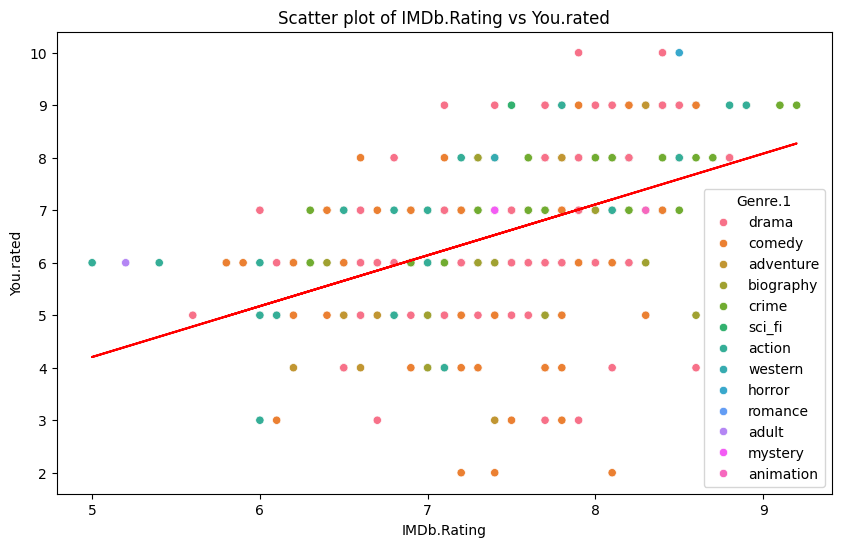

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='imdb', y='mine', hue='Genre.1')
plt.plot(df['IMDb.Rating'], model_fit.params[0] + model_fit.params[1] * df['IMDb.Rating'], color='red')
plt.title('Scatter plot of IMDb.Rating vs You.rated')
plt.xlabel('IMDb.Rating')
plt.ylabel('You.rated')
plt.show()


Drama comédie et un peu aventure (on regarde les notes hautes pour imdb et basses pour l'utilisateur)

## Erreur quadratique moyenne

L'erreur quadratique moyenne notée MSE (Mean Square Error) est très utile pour comparer plusieurs modèles

Donner la valeur de l’erreur quadratique moyenne de votre modèle

In [53]:
print(model_fit.mse_resid)

1.5730349295314738


Construire une fonction donnant un intervalle de confiance pour les valeurs réalisées $Y$ pour une valeur de $X$ donnée.

In [56]:
def confidence_interval(x_value, confidence_level=0.95):
  x = df['IMDb.Rating']
  y = df['You.rated']
  model = sm.OLS(y, sm.add_constant(x)).fit()
  # Changed to create an array with two elements representing the constant and x_value
  predicted_y = model.predict(np.array([[1, x_value]]))
  std_err = np.sqrt(model.mse_resid)
  n = len(x)
  h = std_err * stats.t.ppf((1 + confidence_level) / 2, n - 2)
  return predicted_y - h, predicted_y + h
print(confidence_interval(10))

(array([6.58158599]), array([11.51219507]))


# Année de sortie

Nous sélectionnons les films à partir de l'année 1960.
La dernière variable dans la régression linéaire ci-dessous est alors l'année de sortie du film.

In [57]:
df_2 = df[df["Year"] >= 1960]
df_2.head()

,position,const,created,modified,description,Title,Title.type,Directors,You.rated,IMDb.Rating,Runtime..mins.,Year,Genres,Num..Votes,Release.Date..month.day.year.,URL,mine,imdb,year,time,votes,year.c,Genre.N,Genre.1,Genre.2,Genre.3,Genre.4,Genre.5,drama,comedy,adventure,biography,crime,sci_fi,action,romance,mystery,thriller,new.genre,short.genre,David Fincher,Stanley Kubrick,Steven Soderbergh,Woody Allen,Akira Kurosawa,Martin Scorsese,Darren Aronofsky,David Cronenberg,Guy Ritchie,Lars Von Trier,Pier Paolo Pasolini,Steven Spielberg
1,1,tt2370248,Mon Feb 24 00:00:00 2014,NaN,NaN,Short Term 12,Feature Film,Destin Daniel Cretton,7,8.1,96.0,2013,drama,11359,2013-03-10,http://www.imdb.com/title/tt2370248/,7,8.1,2010s,4.564348,11359,1,1,drama,0,0,0,0,1,0,0,0,0,0,0,0,0,0,serious,drama,0,0,0,0,0,0,0,0,0,0,0,0
2,2,tt1727388,Sat Feb 22 00:00:00 2014,NaN,NaN,The Way Way Back,Feature Film,"Nat Faxon, Jim Rash",6,7.5,103.0,2013,"comedy, drama",59402,2013-01-21,http://www.imdb.com/title/tt1727388/,6,7.5,2010s,4.634729,59402,1,2,comedy,drama,0,0,0,1,1,0,0,0,0,0,0,0,0,light,drama,0,0,0,0,0,0,0,0,0,0,0,0
3,3,tt0970179,Thu Feb 20 00:00:00 2014,NaN,NaN,Hugo,Feature Film,Martin Scorsese,8,7.6,126.0,2011,"adventure, drama, family, mystery",187731,2011-10-10,http://www.imdb.com/title/tt0970179/,8,7.6,2010s,4.836282,187731,3,4,adventure,drama,family,mystery,0,1,0,1,0,0,0,0,0,1,0,adventure,adventure,0,0,0,0,0,1,0,0,0,0,0,0
4,4,tt1007029,Tue Feb 18 00:00:00 2014,NaN,NaN,The Iron Lady,Feature Film,Phyllida Lloyd,6,6.4,105.0,2011,"biography, drama, history",58474,2011-12-26,http://www.imdb.com/title/tt1007029/,6,6.4,2010s,4.653960,58474,3,3,biography,drama,history,0,0,1,0,0,1,0,0,0,0,0,0,serious,biography,0,0,0,0,0,0,0,0,0,0,0,0
5,5,tt0242888,Mon Feb 17 00:00:00 2014,NaN,NaN,The Sleeping Dictionary,Feature Film,Guy Jenkin,6,6.6,109.0,2003,"drama, romance",5915,2003-01-31,http://www.imdb.com/title/tt0242888/,6,6.6,2000s,4.691348,5915,11,2,drama,romance,0,0,0,1,0,0,0,0,0,0,1,0,0,light,drama,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
X = df_2[["imdb","Year" ]]
X_OLS = sm.add_constant(X)
Y = df_2["mine"].values.reshape(-1, 1)

model = sm.OLS(endog=Y, exog=X_OLS)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     65.65
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           1.97e-25
Time:                        18:09:39   Log-Likelihood:                -666.63
No. Observations:                 409   AIC:                             1339.
Df Residuals:                     406   BIC:                             1351.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4372      9.405      3.874      0.000      17.949      54.925
imdb           0.8656      0.092      9.379      0.000       0.684       1.047
Year          -0.0182      0.005     -3.946      0.000      -0.027      -0.009
==============================================================================
Omnibus:                       74.137   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.312
Skew:                          -1.012   Prob(JB):                     9.25e-31
Kurtosis:                       5.005   Cond. No.                     3.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Un film ancien est-il généralement mieux noté ? Pourquoi selon vous ?

La postérité ne garde que des bons films !Plus un film est récent plus il a de chance d'être mal noté car il été vu sans être conseillé.

Affichez les résidus de la régression linéaire en fonction des années.

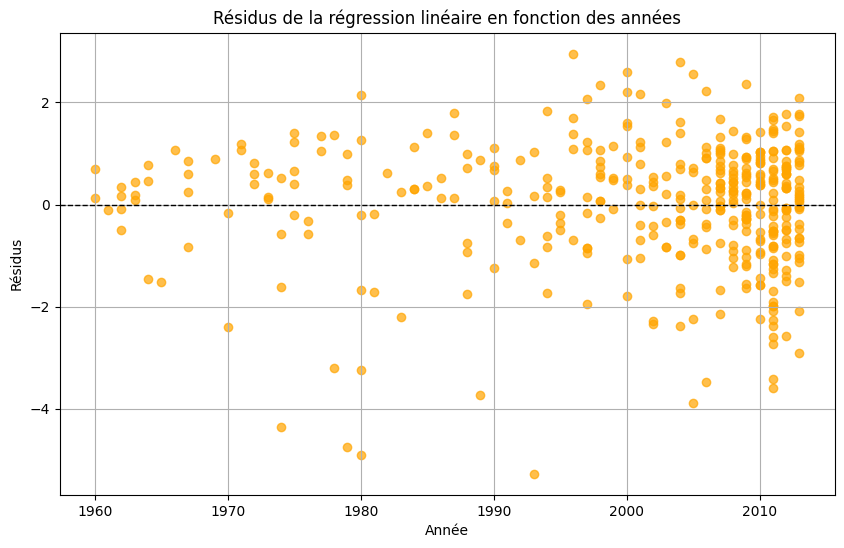

In [60]:
# Résidus de la régression
residuals = model_fit.resid

# Get years from df_2 to match the data used in the model
years = df_2['Year']

# Tracer les résidus en fonction des années
plt.figure(figsize=(10, 6))
plt.scatter(years, residuals, color='orange', alpha=0.7)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title("Résidus de la régression linéaire en fonction des années")
plt.xlabel("Année")
plt.ylabel("Résidus")
plt.grid(True)
plt.show()

# Train et test

Entrainez votre modèle sur 80% des données en utlisant les variablesde list_col. Comparer les résultats en test et en train et choisissez (ou non) d'implémenter votre modèle.

In [61]:
list(df.columns)

['position',
 'const',
 'created',
 'modified',
 'description',
 'Title',
 'Title.type',
 'Directors',
 'You.rated',
 'IMDb.Rating',
 'Runtime..mins.',
 'Year',
 'Genres',
 'Num..Votes',
 'Release.Date..month.day.year.',
 'URL',
 'mine',
 'imdb',
 'year',
 'time',
 'votes',
 'year.c',
 'Genre.N',
 'Genre.1',
 'Genre.2',
 'Genre.3',
 'Genre.4',
 'Genre.5',
 'drama  ',
 'comedy  ',
 'adventure  ',
 'biography  ',
 'crime  ',
 'sci_fi  ',
 'action  ',
 'romance  ',
 'mystery  ',
 'thriller  ',
 'new.genre',
 'short.genre',
 'David Fincher  ',
 'Stanley Kubrick  ',
 'Steven Soderbergh  ',
 'Woody Allen  ',
 'Akira Kurosawa  ',
 'Martin Scorsese  ',
 'Darren Aronofsky  ',
 'David Cronenberg  ',
 'Guy Ritchie  ',
 'Lars Von Trier  ',
 'Pier Paolo Pasolini  ',
 'Steven Spielberg  ']

In [62]:
list_col =["imdb","Year",
           'comedy  ',
 'adventure  ',
 'biography  ',
 'crime  ',
 'sci_fi  ',
 'action  ',
 'romance  ',
 'mystery  ',
 'thriller  ',]

Coefficients du modèle: [0.96217295]
Intercept du modèle: -0.5885225257272086

Performances du modèle:
Train MSE: 1.5186481497282929
Test MSE: 1.7517701716157628
Train R^2: 0.23111641842911068
Test R^2: 0.18732891422088827


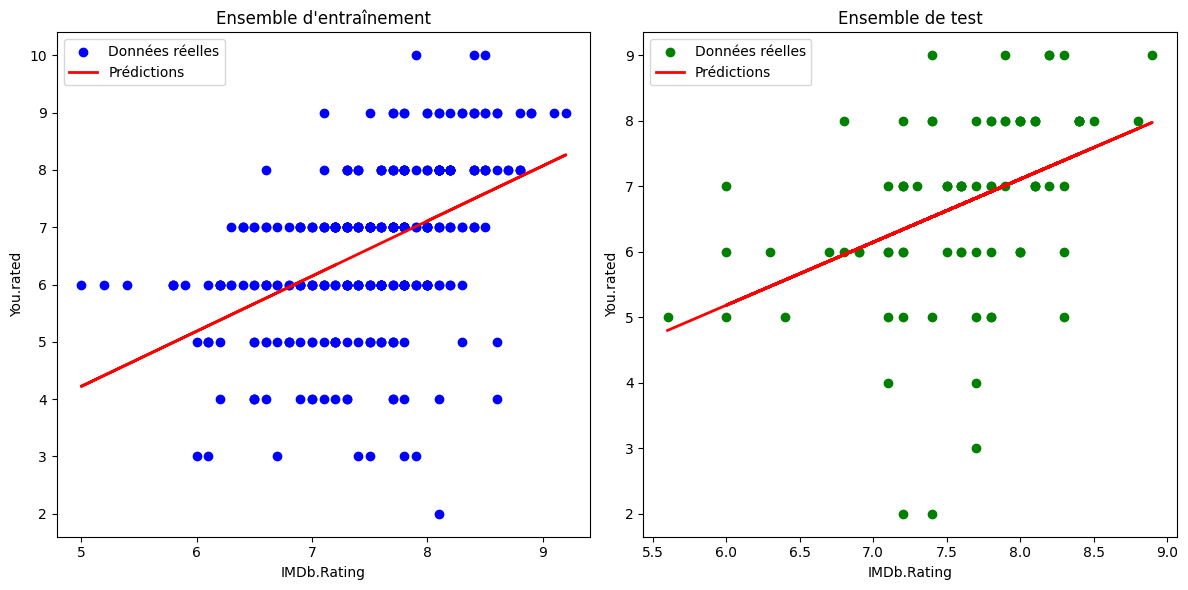

In [66]:
#TODO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que list_col est la liste des variables à utiliser pour l'entraînement
list_col = ['IMDb.Rating']  # Remplacez cette ligne par les variables que vous souhaitez utiliser
# Si plusieurs variables sont présentes dans list_col, elles peuvent être ajoutées ici.

# Sélection des variables d'entrée (X) et de sortie (y)
X = df[list_col]
y = df['You.rated']

# Diviser les données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Afficher les coefficients du modèle
print("Coefficients du modèle:", model.coef_)
print("Intercept du modèle:", model.intercept_)

# Prédictions sur les ensembles train et test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des erreurs (MSE et R^2) sur l'ensemble d'entraînement et de test
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Afficher les performances du modèle
print("\nPerformances du modèle:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Graphique pour l'ensemble d'entraînement
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Données réelles')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Prédictions')
plt.title('Ensemble d\'entraînement')
plt.xlabel('IMDb.Rating')
plt.ylabel('You.rated')
plt.legend()

# Graphique pour l'ensemble de test
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Données réelles')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Prédictions')
plt.title('Ensemble de test')
plt.xlabel('IMDb.Rating')
plt.ylabel('You.rated')
plt.legend()

plt.tight_layout()
plt.show()